In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

In [2]:
def plot_signal(y, sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Signal')
    plt.tight_layout()
    plt.show()

def compute_chroma(y, sr):
    S = np.abs(librosa.stft(y))**2
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.title('Chromagram using power spectrogram')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

def plot_harmonic_and_percussive_components(y, sr):
    # use one plot only with the legend
    plt.figure(figsize=(14, 5))
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    plt.plot(y_harmonic, label='Harmonic')
    plt.plot(y_percussive, label='Percussive')
    plt.legend()
    plt.title('Harmonic and Percussive components of the signal')
    plt.tight_layout()
    plt.show()

def plot_tempogram(y, sr):    
    plt.figure(figsize=(14, 5))
    oenv = librosa.onset.onset_strength(y=y, sr=sr)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr)
    librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma')
    plt.title('Tempogram')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

def plot_beats_and_plt_beats(y, sr, n_fft=4096):
    plt.figure(figsize=(14, 5))
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
    plt.plot(onset_env, label='Onset strength')
    plt.vlines(beats, 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
    plt.legend()
    plt.title('librosa.beat.beat_track')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(14, 5))
    plt.plot(pulse, label='PLP')
    plt.vlines(beats_plp, 0, 1, alpha=0.5, color='r', linestyle='--', label='PLP Beats')
    plt.legend()
    plt.title('librosa.beat.plp')
    plt.tight_layout()
    plt.show()
    
    '''onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
    times = librosa.times_like(onset_env, sr=sr)
    ax[0].plot(times, librosa.util.normalize(onset_env),
            label='Onset strength')
    ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
                linestyle='--', label='Beats')
    ax[0].legend()
    ax[0].set(title='librosa.beat.beat_track')
    ax[0].label_outer()
    # Limit the plot to a 15-second window
    times = librosa.times_like(pulse, sr=sr)
    ax[1].plot(times, librosa.util.normalize(pulse),
            label='PLP')
    ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
                linestyle='--', label='PLP Beats')
    ax[1].legend()
    ax[1].set(title='librosa.beat.plp', xlim=[5, 20])
    ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())
    plt.tight_layout()
    plt.show()'''


def plot_spectrograms(y, sr):
    D = librosa.stft(y)
    H, P = librosa.decompose.hpss(D)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True)
    # increase fig size
    fig.set_size_inches(14, 14)  

    img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='Full power spectrogram')
    ax[0].label_outer()
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(D))), y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='Harmonic power spectrogram')
    ax[1].label_outer()
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max(np.abs(D))), y_axis='log', x_axis='time', ax=ax[2])
    ax[2].set(title='Percussive power spectrogram')
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time', sr=sr)
    ax[3].set(title='Mel spectrogram')

    fig.colorbar(img, ax=ax, format='%+2.0f dB')





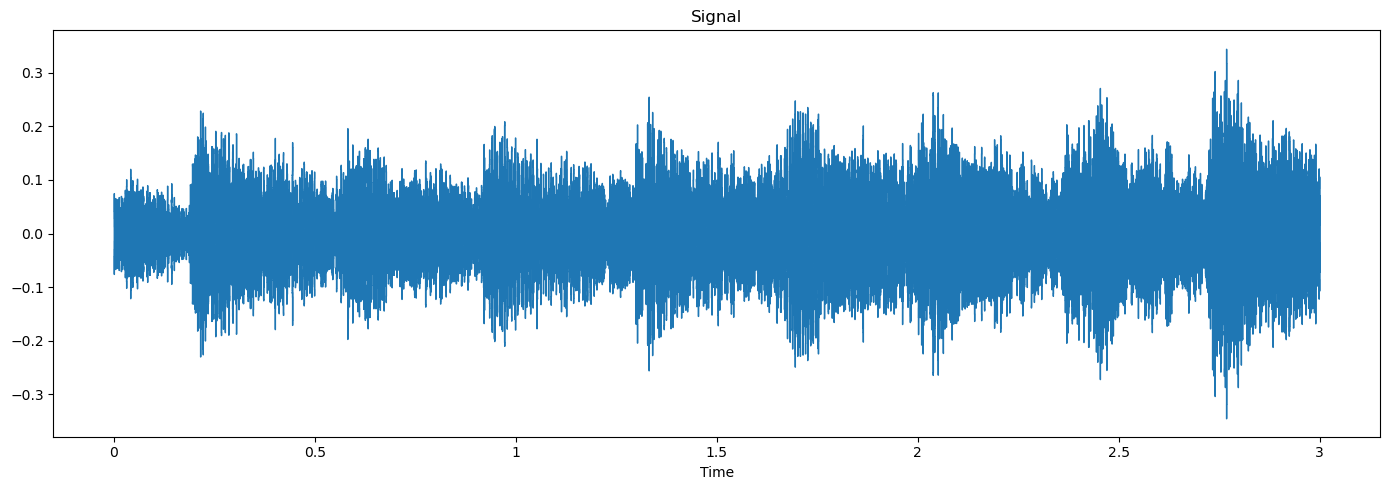

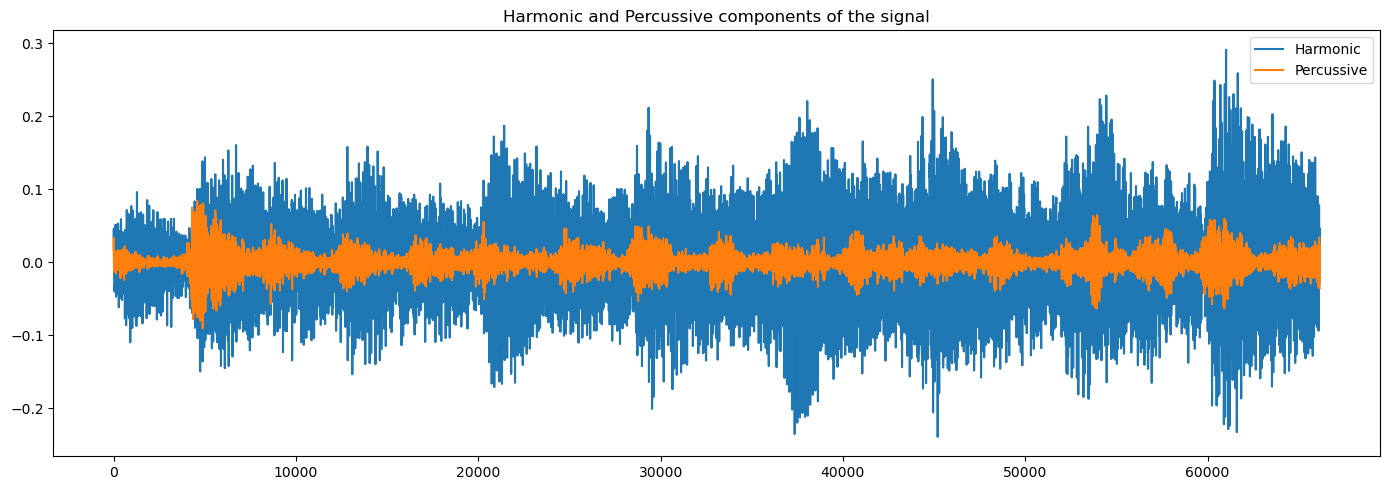

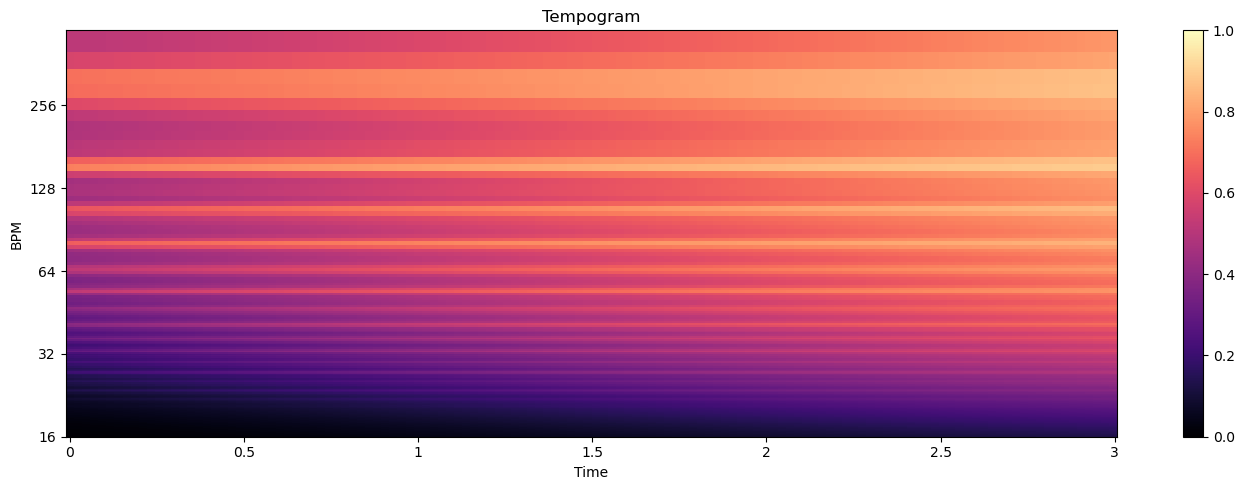

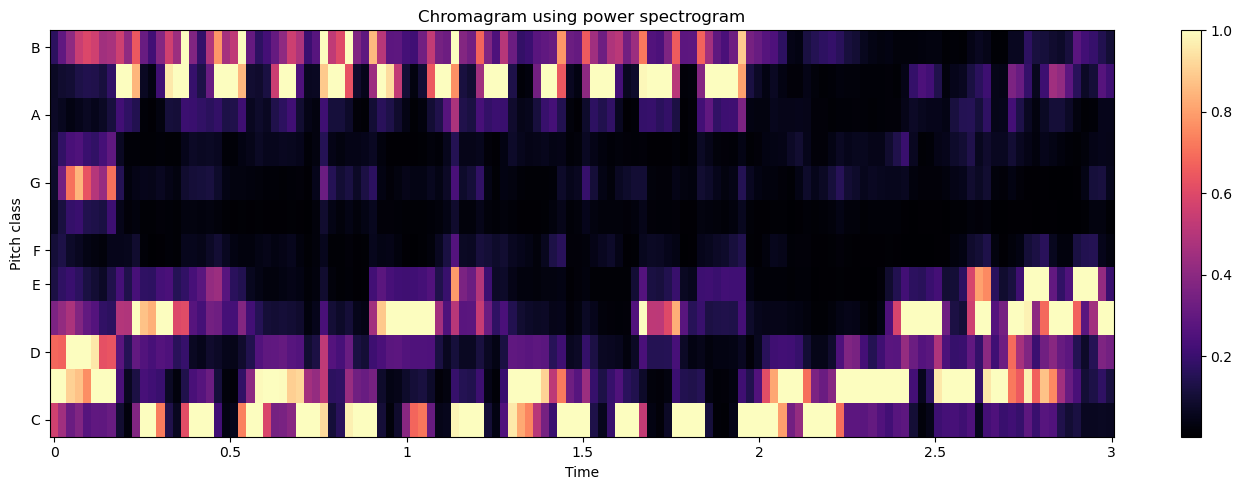

/home/tin/miniconda3/envs/lumen/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=384 is too small for input signal of length=130
  return f(*args, **kwargs)


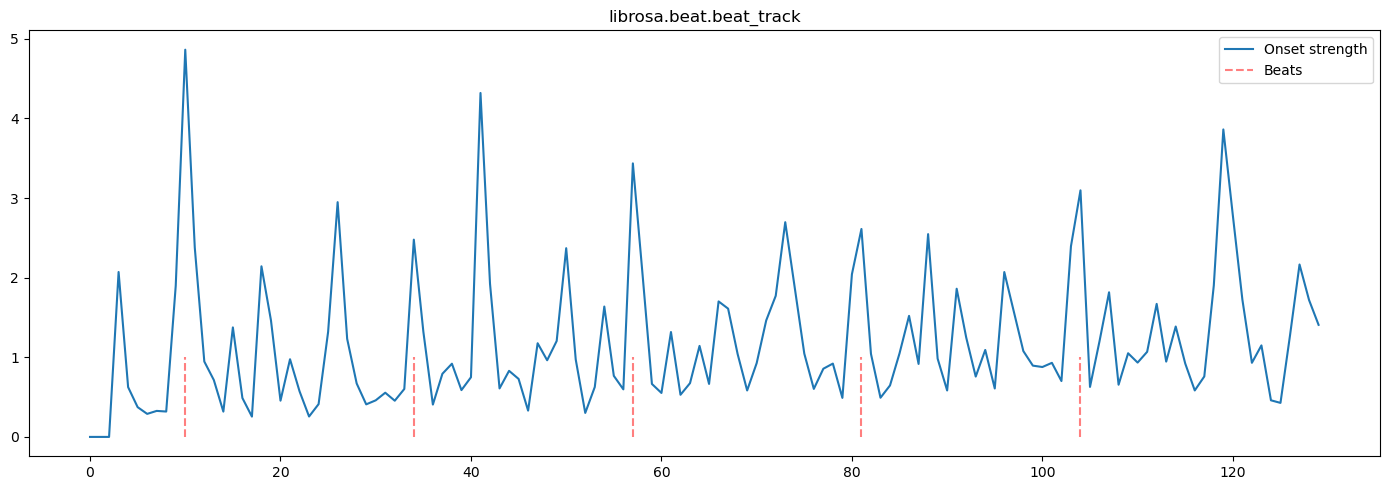

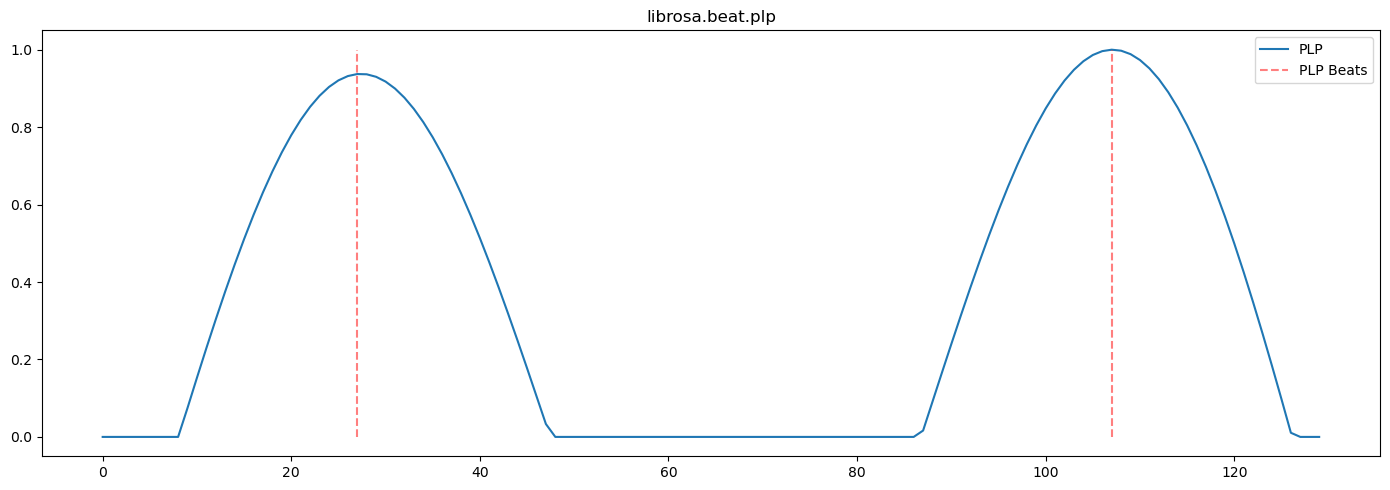

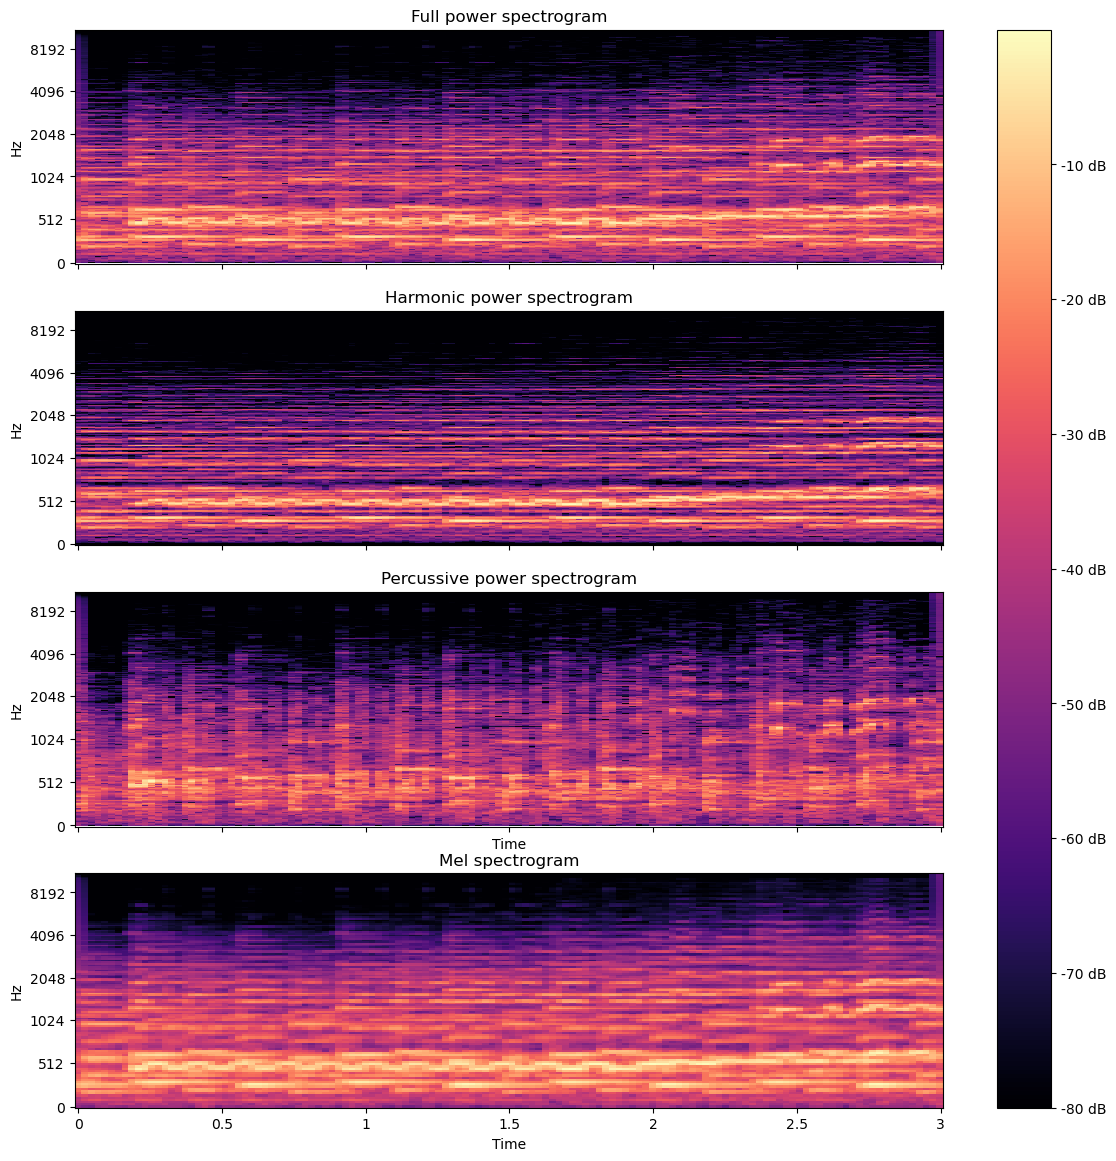

In [3]:
# load audio file with librosa
y, sr = librosa.load('IRMAS_Training_Data/cla/[cla][cla]0152__2.wav')

# plot the signal:
plot_signal(y, sr)

# plot the harmonic and percussive components:
plot_harmonic_and_percussive_components(y, sr)

# plot the tempogram:
plot_tempogram(y, sr)

# compute and plot the chromagram:
compute_chroma(y, sr)

# plot the beat track and the plp:
plot_beats_and_plt_beats(y, sr)

# plot the full, harmonic, and percussive power spectrograms:
plot_spectrograms(y, sr)

